# Capstone final project

In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Introduction/Business Problem

Denver Colorado Is a very busy place full of grocery stores, resturants, and other small businesses. Part of this is due to the masssive inflow of people moving to Colorado for business and other factors. Since there is a lot of people moving into a place they have never been before I wanted to create a module that will help them determine the best places to live. The plan is to look at the crime in the area so people can understand the safest places to live based on the crime dataset.

## Data used

Crime data - https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime

## Methodology

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Libraries imported.


In [4]:
df = pd.read_csv('crime.csv')

In [5]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2015664356,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0


In [18]:
df.shape

(477213, 19)

### cleaning the data

In [36]:
df1 = df.drop(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE','PRECINCT_ID', 'GEO_X', 'GEO_Y'], axis=1)

In [37]:
df1.head()

,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,-104.866156,39.755561,5,stapleton,1,0
1,0,traffic-accident,traffic-accident,11/13/2015 7:45:00 AM,NaN,11/13/2015 8:38:00 AM,4100 BLOCK W COLFAX AVE,-105.040760,39.739991,1,west-colfax,0,1
2,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,-104.999264,39.753669,6,union-station,1,0
3,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,-105.029208,39.738134,1,west-colfax,1,0
4,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,-104.828868,39.797750,5,montbello,1,0


In [8]:
df1.shape

(477213, 11)

### Analysis for data

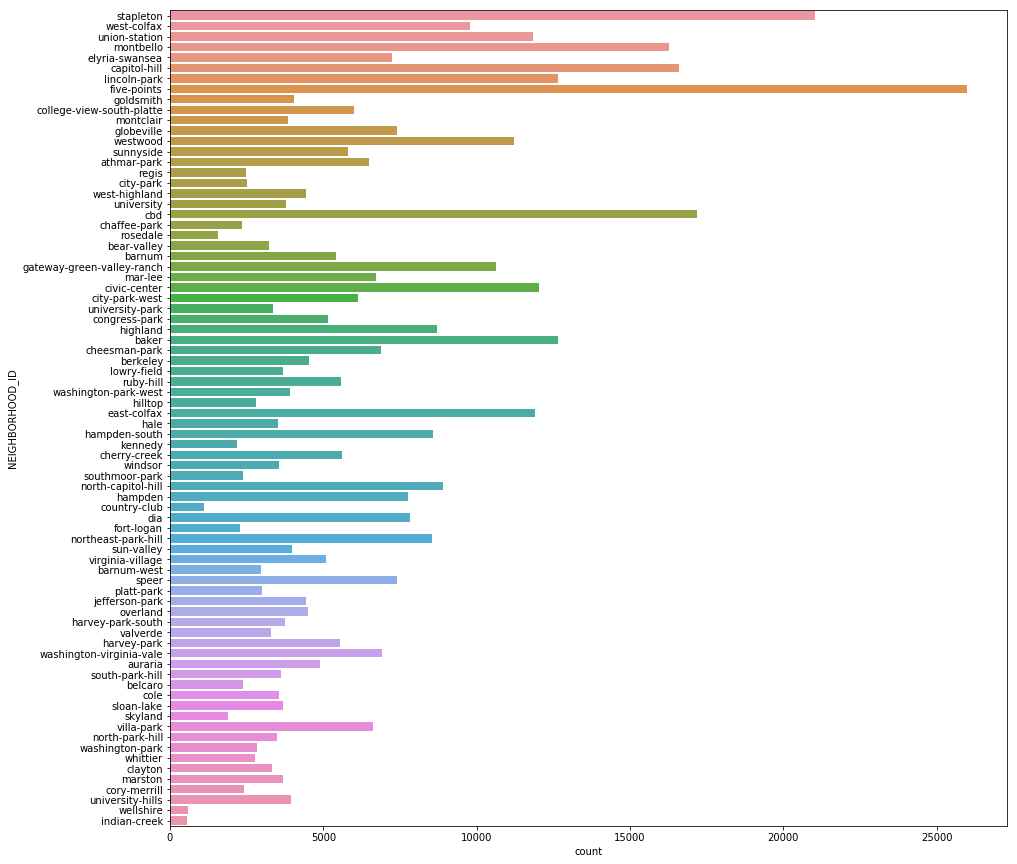

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(y='NEIGHBORHOOD_ID', data = df1, ax=ax)

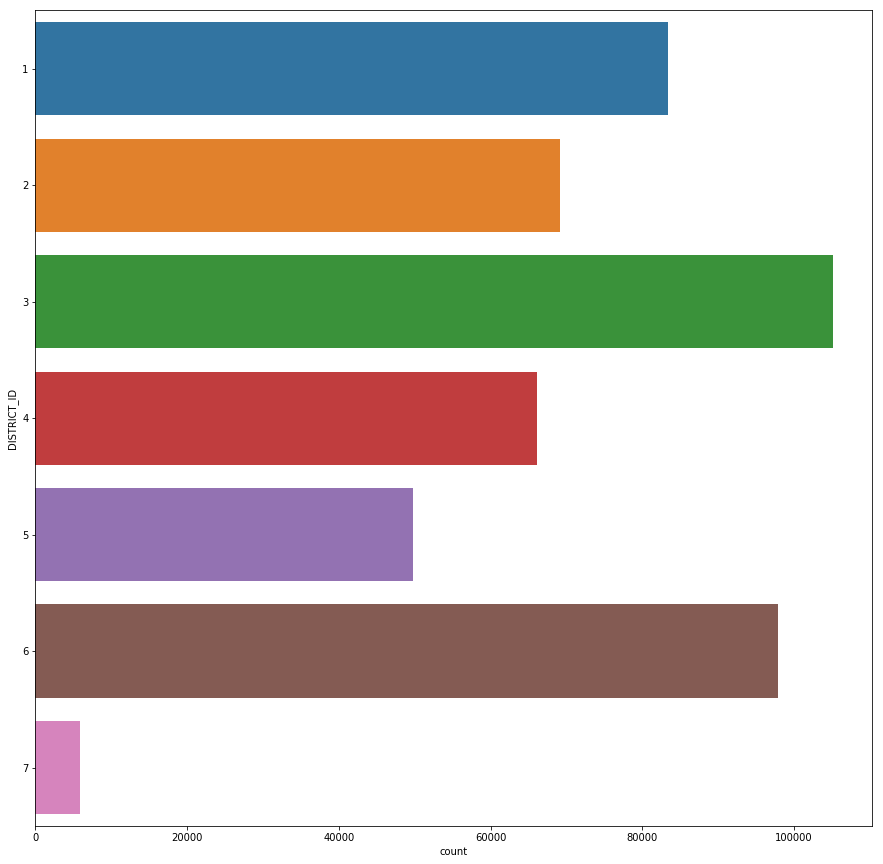

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(y='DISTRICT_ID', data = df1, ax=ax)

This graph is taking a look at the places where crime is the highest and where it is the lowest. I hope to use this to organize the data in a way that provides us with locations on the map where crime is high and places where crime is low.

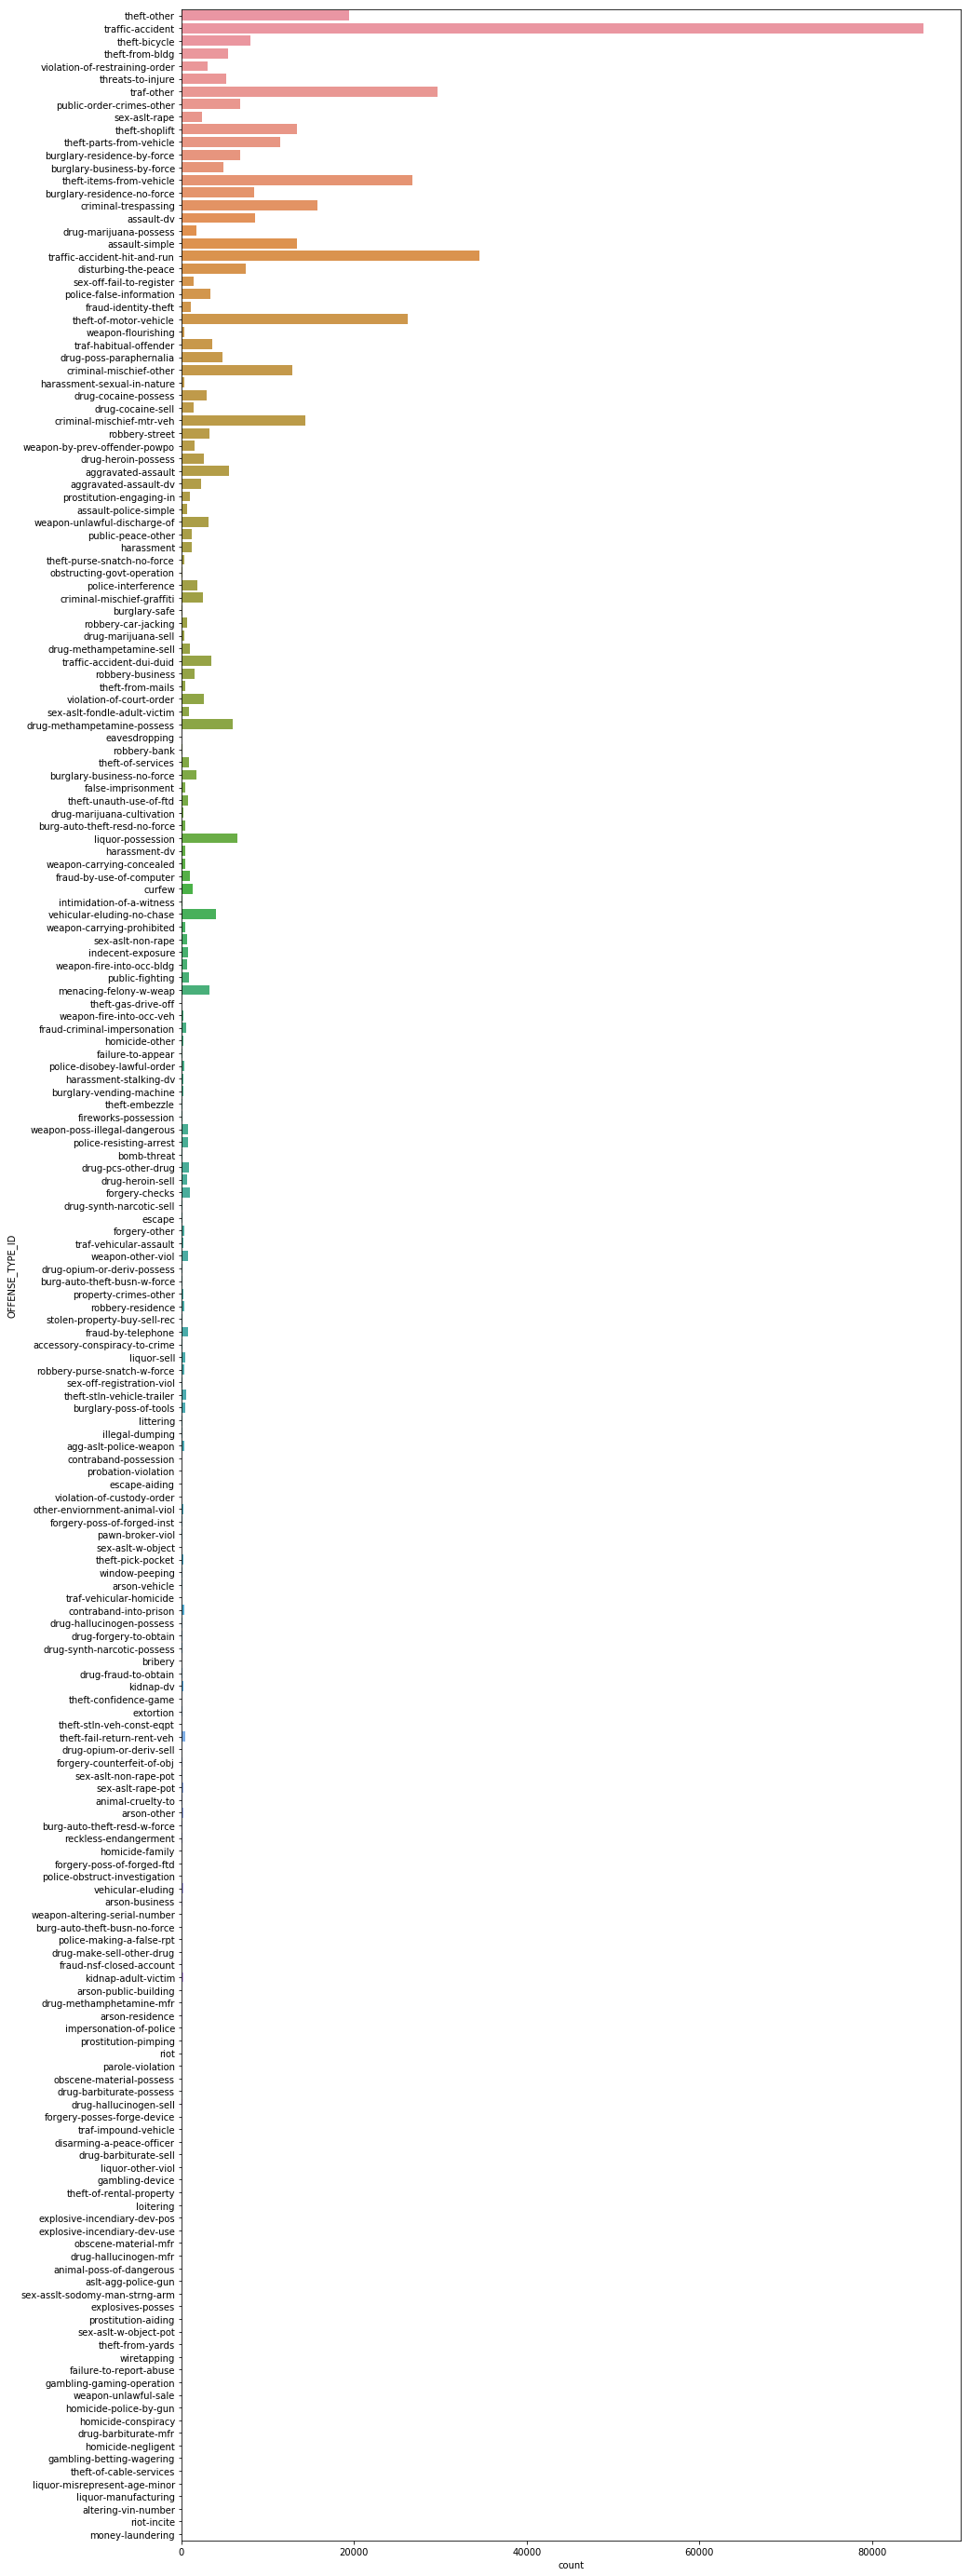

In [23]:
fig, ax = plt.subplots(figsize=(15,50))
sns.countplot(y='OFFENSE_TYPE_ID', data = df1, ax=ax)

In [35]:
# fig, ax = plt.subplots(figsize=(15,15))
# sns.barplot(x= 'DISTRICT_ID', y='OFFENSE_TYPE_ID', data = df1, ax=ax)

# max_key = df1['OFFENSE_TYPE_ID'].max()
# print(max_key)

thing = df1.sort_values('OFFENSE_TYPE_ID', ascending=False)
print(thing)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
temp = df1.groupby(['DISTRICT_ID']).count()

In [12]:
print('District data')
for DISTRICT_ID, val in zip(temp.index, temp['NEIGHBORHOOD_ID']):
    print(f'{DISTRICT_ID}: {val}')

District data
1: 83385
2: 69077
3: 105067
4: 66113
5: 49802
6: 97860
7: 5909


In [13]:
# Dnever latitude and longitude
den_lat = 39.7392
den_lng = -104.9903

m = folium.Map([den_lat, den_lng], zoom_start=11)
m

In [14]:
kclusters = 7
kmeans = KMeans(n_clusters=kclusters, random_state=0)
